In [4]:
import pandas as pd

df = pd.read_excel("D:/치안빅데이터/데이터/전처리완료.xlsx")

In [5]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [39]:
df['접수완료날짜'] = df['접수완료날짜'].apply(lambda x: x.replace('/','-'))

### 1차 전처리 후, EDA 파트

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


#### 1. 사건종별 EDA

In [20]:
df['사건종별'].value_counts()

401    162851
406     52200
402     37558
403     23782
405        30
404        15
Name: 사건종별, dtype: int64

#### 401 -> 406 -> 402 -> 403 순으로 위 4개 인덱스가 압도적으로 많다.
#### 생각1. 암 발병률처럼 극소값인 405, 404를 예측하는 알고리즘 만들기
#### 생각2. 405, 404를 버리고 살펴보기

In [180]:
df['시군구'].unique()

array(['천안시', '유성구', '중구', '청양군', '아산시', '서산시', '동구', '논산시', '서구', '세종시',
       '계룡시', '보령시', '금산군', '공주시', '당진시', '대덕구', '태안군', '예산군', '서천군',
       '홍성군', '부여군'], dtype=object)

#### 시구군 인덱스 중 소수의 인덱스가 동, 읍, 리 등 다른 단위가 들어가 있음
#### 초반 전처리 단계에서 인덱스 이름이 통일되지 않은 데이터로 추정
#### 소수이므로 시군구 데이터에 동, 읍, 리 등 인덱스는 제거
#### 이를 위해서 value_counts()가 100 이하인 인덱스 제거 

In [53]:
counts = df['시군구'].value_counts()
df = df[df['시군구'].isin(counts[counts >= 100].index)]

#### 시도별 사건발생 추세 시각화

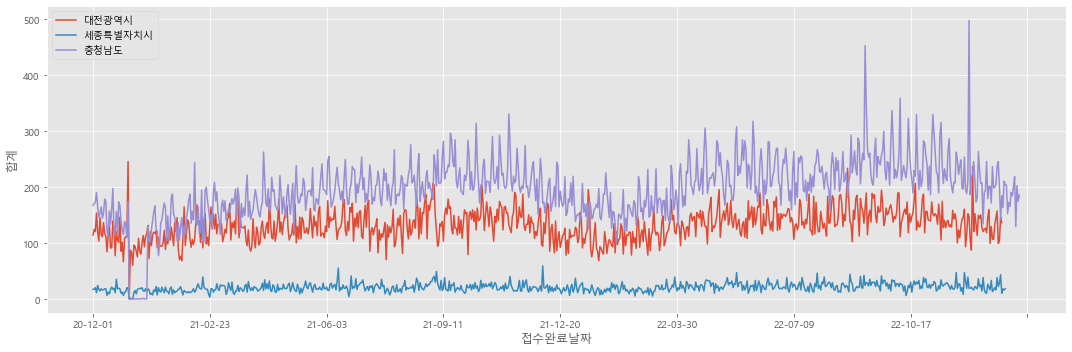

In [132]:
big_df_grouped = df.groupby(['광역시/도', '접수완료날짜']).size().reset_index(name='counts')


fig, ax = plt.subplots(figsize=(15, 5))

for name, group in big_df_grouped.groupby('광역시/도'):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)

ax.set_xlabel('접수완료날짜')
ax.set_ylabel('합계')
ax.legend()
plt.tight_layout()
plt.show()

In [142]:
103413 / 779

132.7509627727856

In [143]:
big_df_grouped.groupby('광역시/도').mean()

,counts
광역시/도,
대전광역시,132.750963
세종특별자치시,21.658568
충청남도,196.464736


#### 시군구별 사건발생 추세 시각화

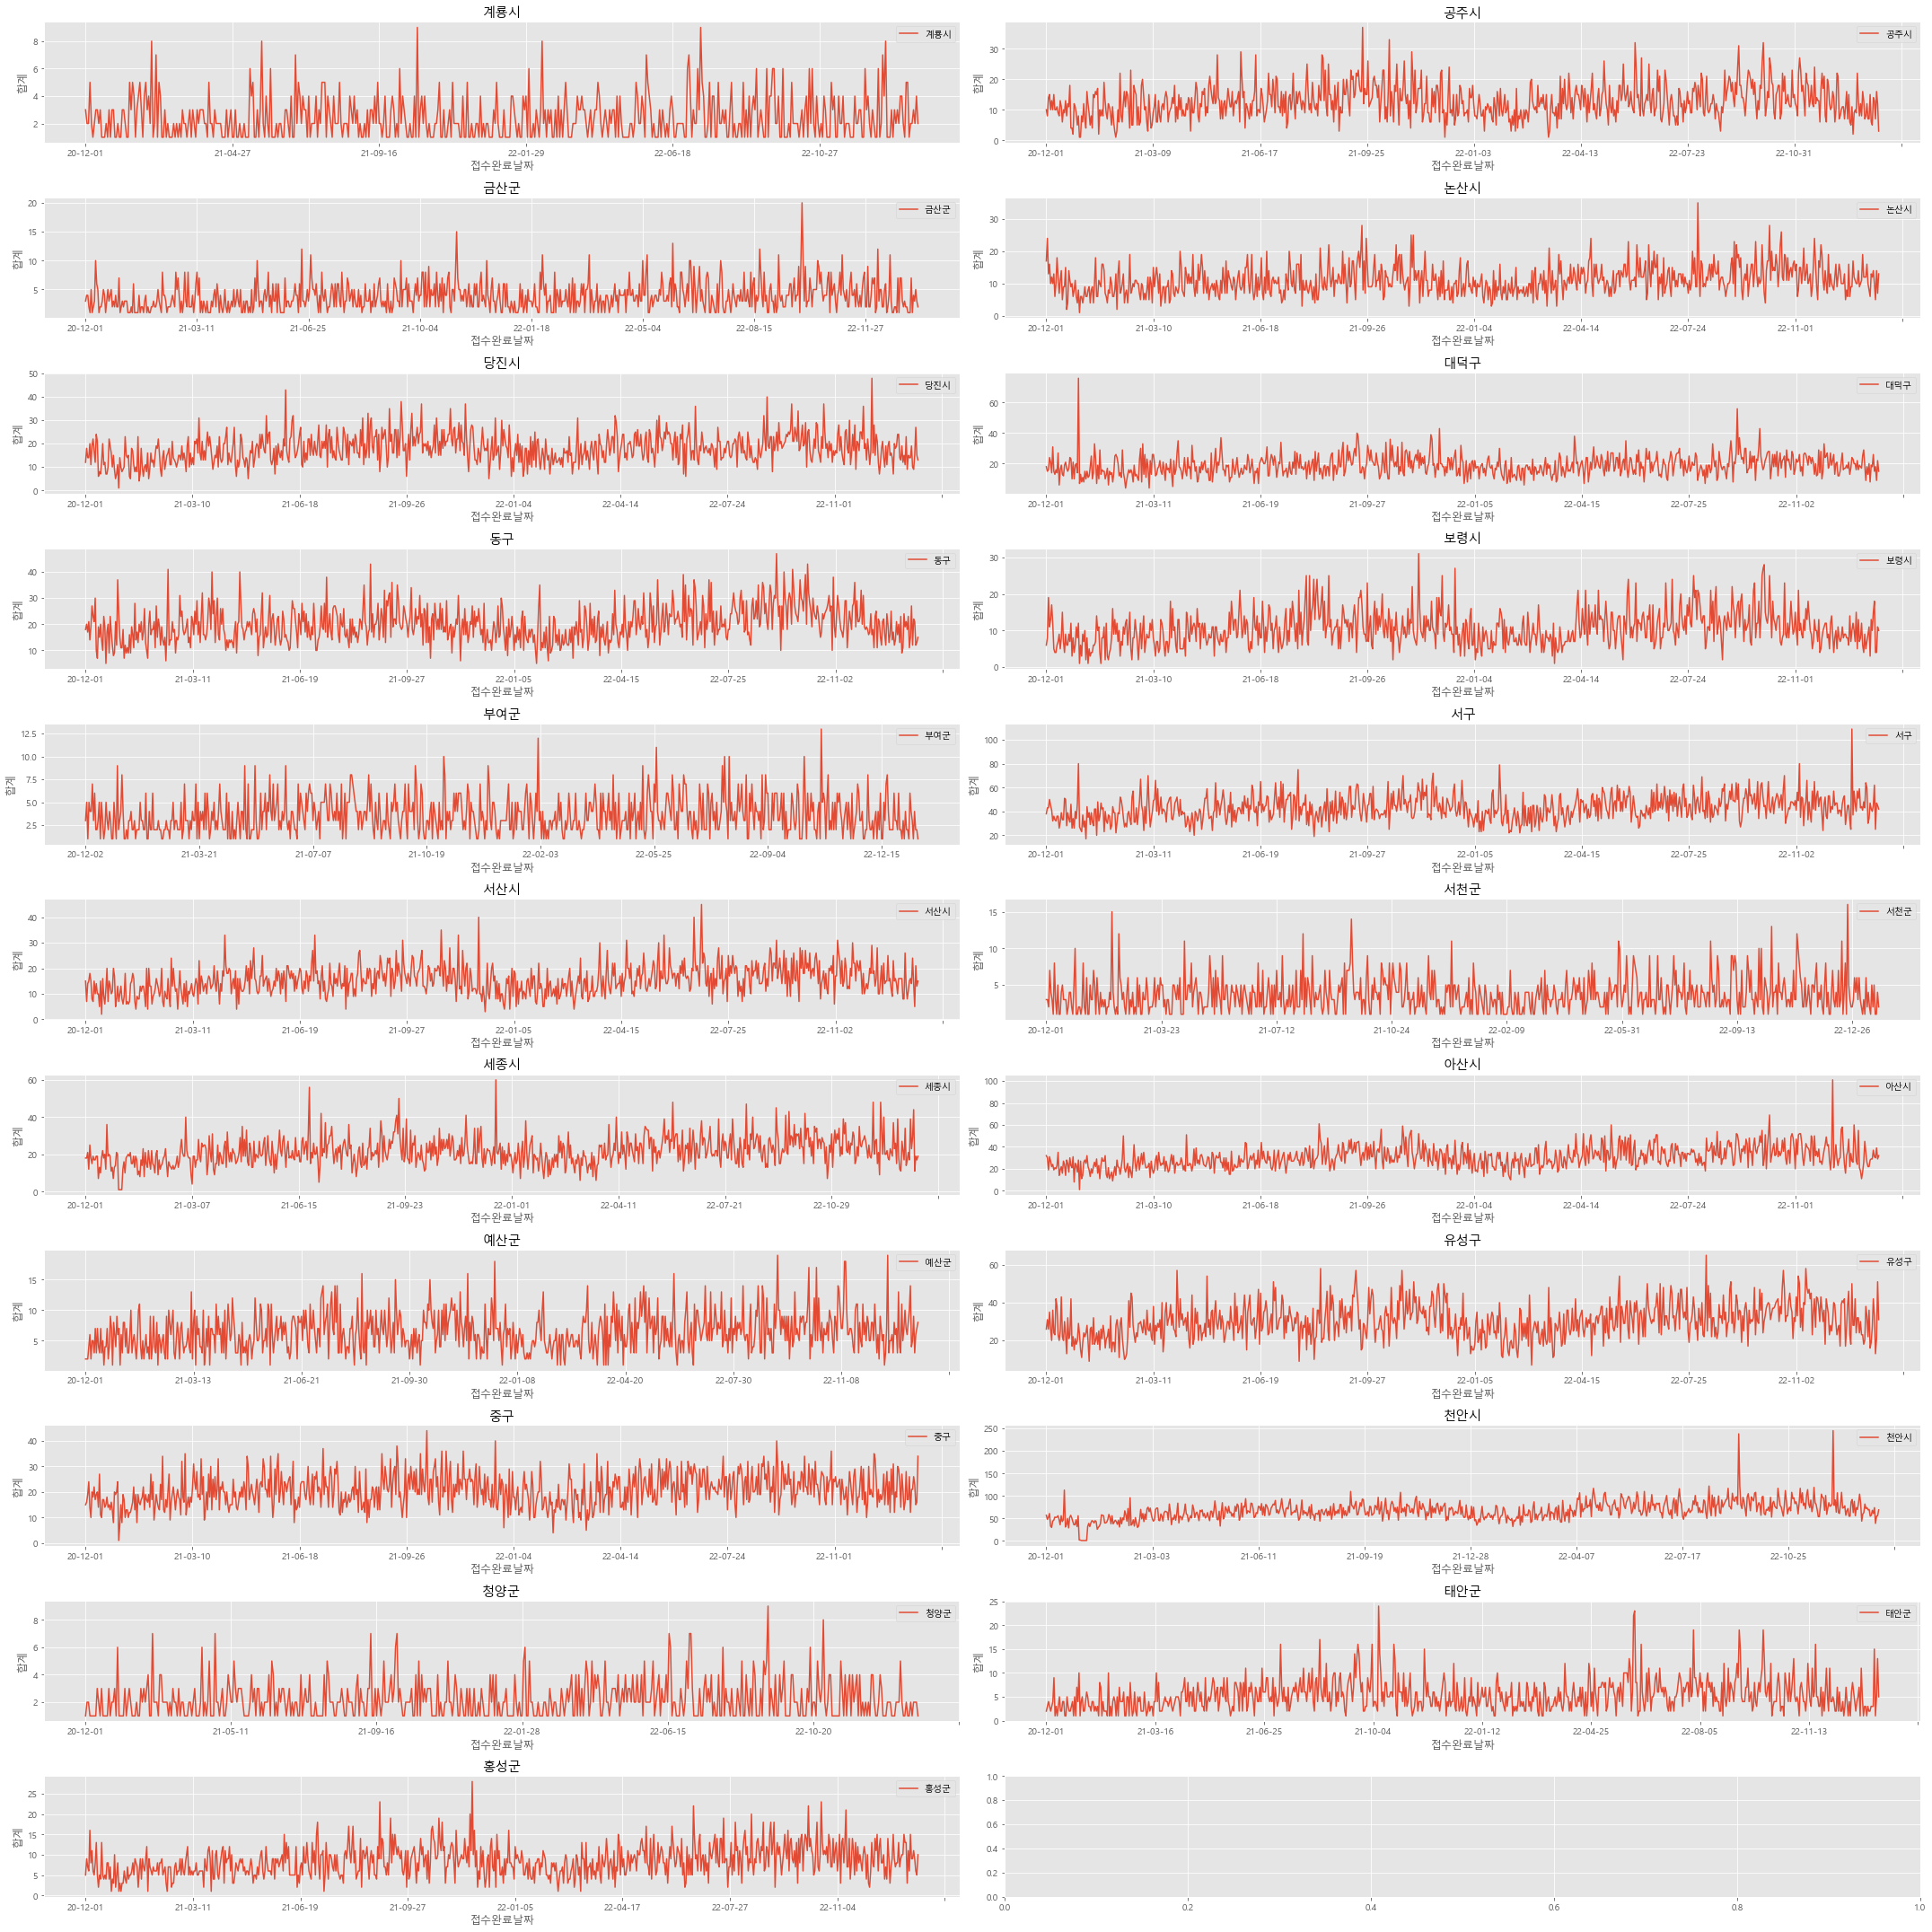

In [60]:
df_grouped = df.groupby(['시군구', '접수완료날짜']).size().reset_index(name='counts')

fig, axs = plt.subplots(nrows=math.ceil(len(df_grouped['시군구'].unique()) / 2), ncols=2, figsize=(30, 30))
axs = axs.flatten()

for ax, (name, group) in zip(axs, df_grouped.groupby('시군구')):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)
    ax.set_title(name)
    ax.set_xlabel('접수완료날짜')
    ax.set_ylabel('합계')
    ax.legend()
    
plt.tight_layout()
plt.show()

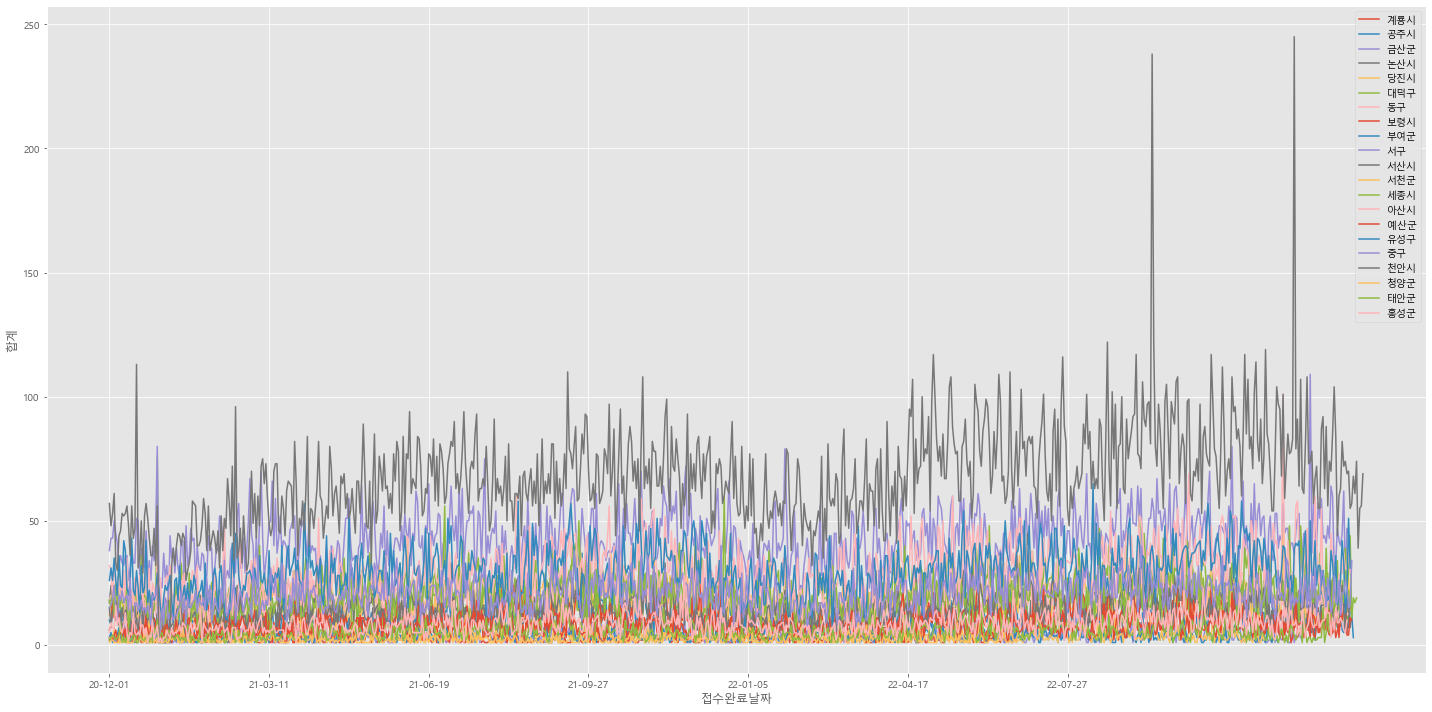

In [125]:
fig, ax = plt.subplots(figsize=(20, 10))

for name, group in df_grouped.groupby('시군구'):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)

    ax.set_xlabel('접수완료날짜')
    ax.set_ylabel('합계')
    ax.legend()

plt.tight_layout()
plt.show()

#### 한번에 보기에 너무 많아 시도별로 나눠서 봄

In [64]:
daejeon = df[df['광역시/도'] == '대전광역시']
sejong = df[df['광역시/도'] == '세종특별자치시']
chongnam = df[df['광역시/도'] == '충청남도']

In [66]:
daejeon_group = daejeon.groupby(['시군구', '접수완료날짜']).size().reset_index(name='counts')
sejong_group = sejong.groupby(['시군구', '접수완료날짜']).size().reset_index(name='counts')
chongnam_group = chongnam.groupby(['시군구', '접수완료날짜']).size().reset_index(name='counts')

#### (1) 대전

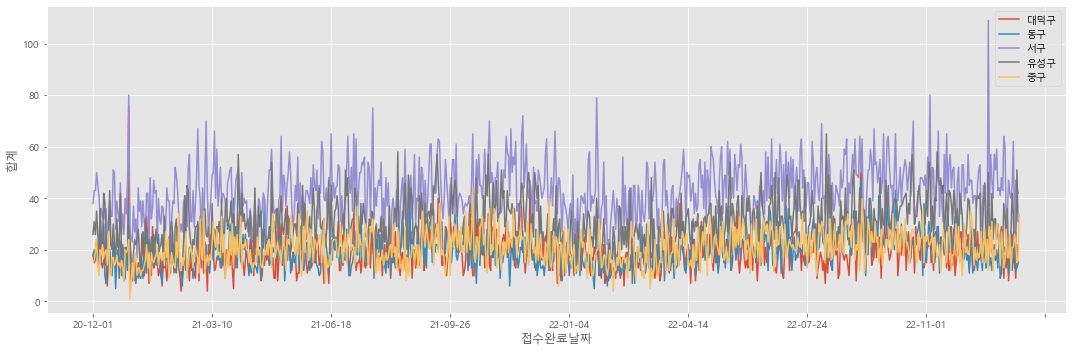

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))

for name, group in daejeon_group.groupby('시군구'):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)

    ax.set_xlabel('접수완료날짜')
    ax.set_ylabel('합계')
    ax.legend()

plt.tight_layout()
plt.show()

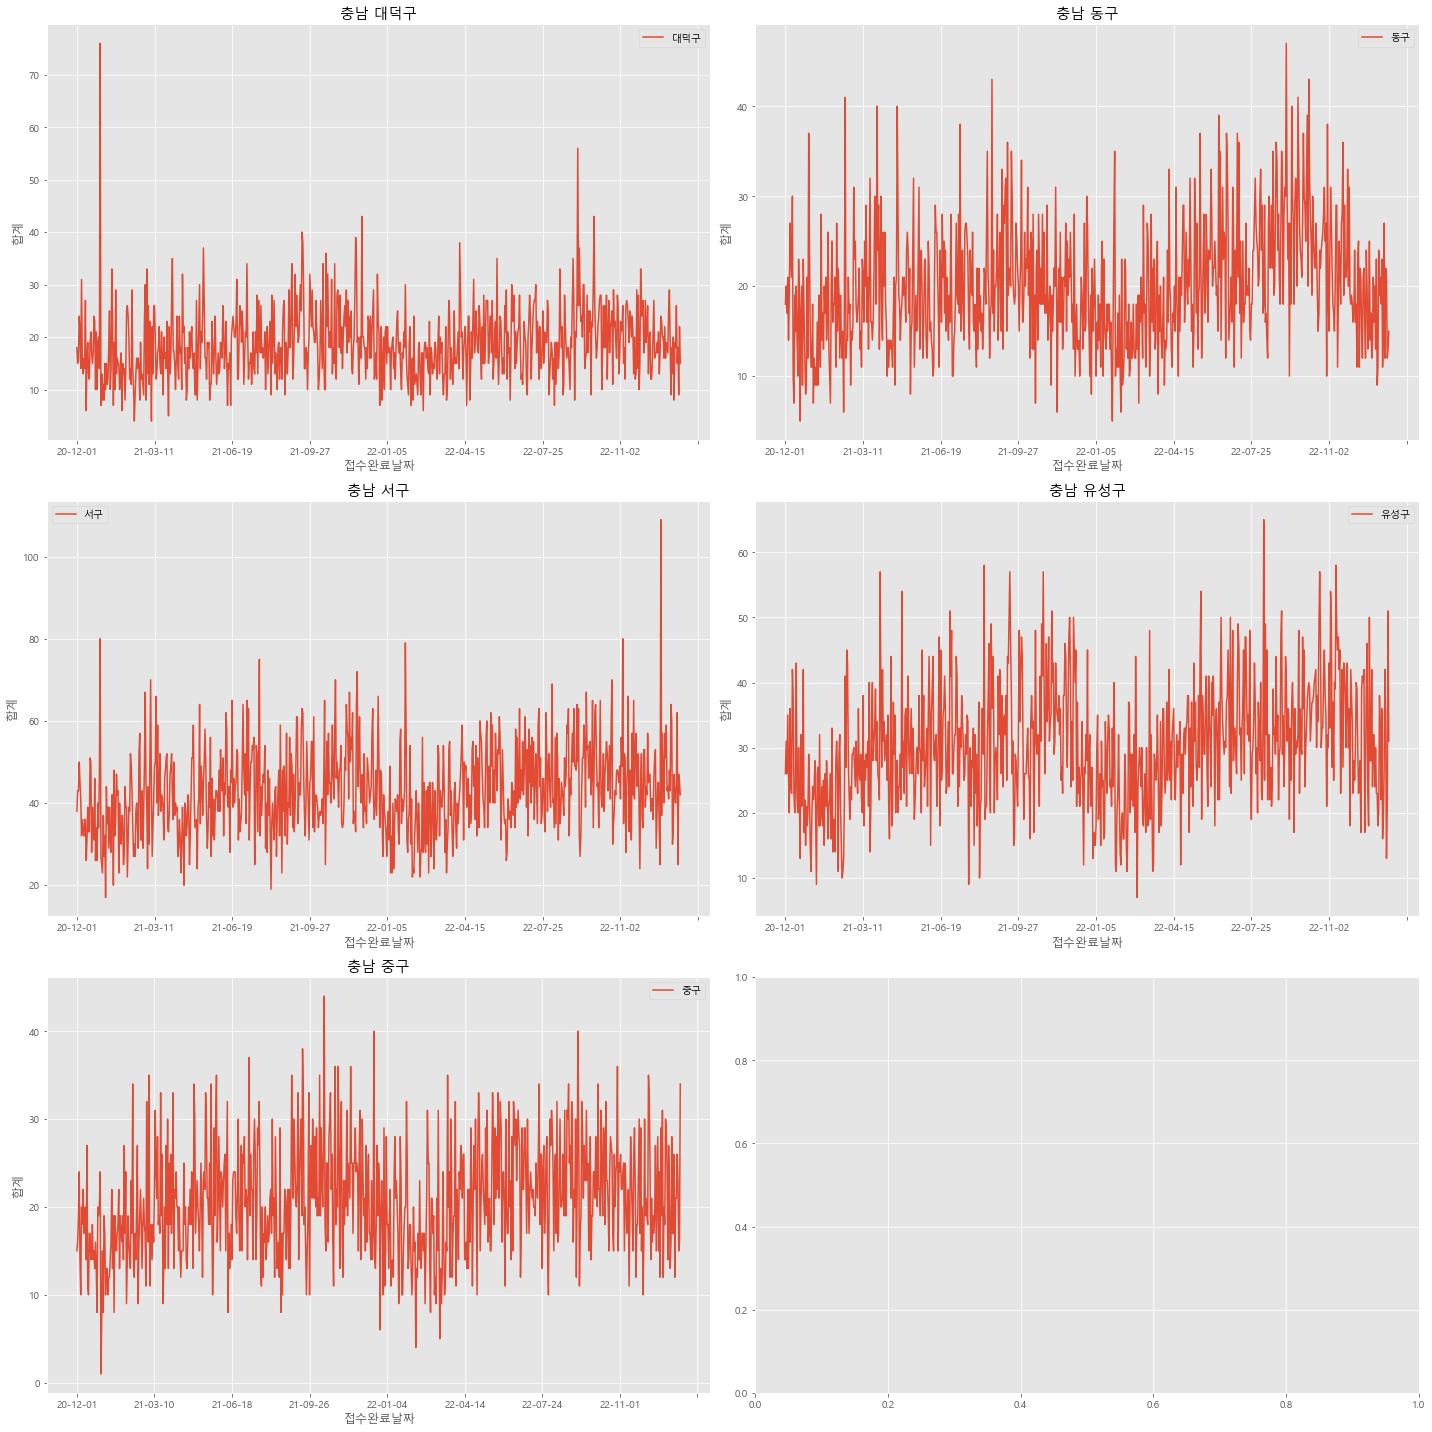

In [95]:
fig, axs = plt.subplots(nrows=math.ceil(len(daejeon_group['시군구'].unique()) / 2), ncols=2, figsize=(20, 20))
axs = axs.flatten()

for ax, (name, group) in zip(axs, daejeon_group.groupby('시군구')):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)
    ax.set_title('충남 ' + name)
    ax.set_xlabel('접수완료날짜')
    ax.set_ylabel('합계')
        
plt.tight_layout()
plt.show()

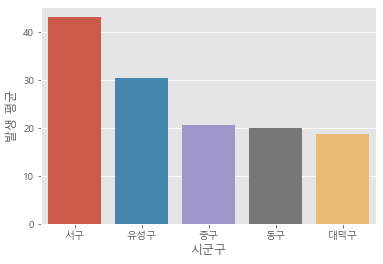

In [117]:
daejeon_mean = daejeon_group.groupby('시군구').mean().sort_values(by='counts',ascending=False)
sns.barplot(x=daejeon_mean.index,y='counts',data=daejeon_mean)
plt.ylabel('발생 평균')
plt.show()

#### 평균 집계 방식 (발생횟수의 총합 / 각 시군구의 사건발생일자의 총합)

#### (2) 충청남도

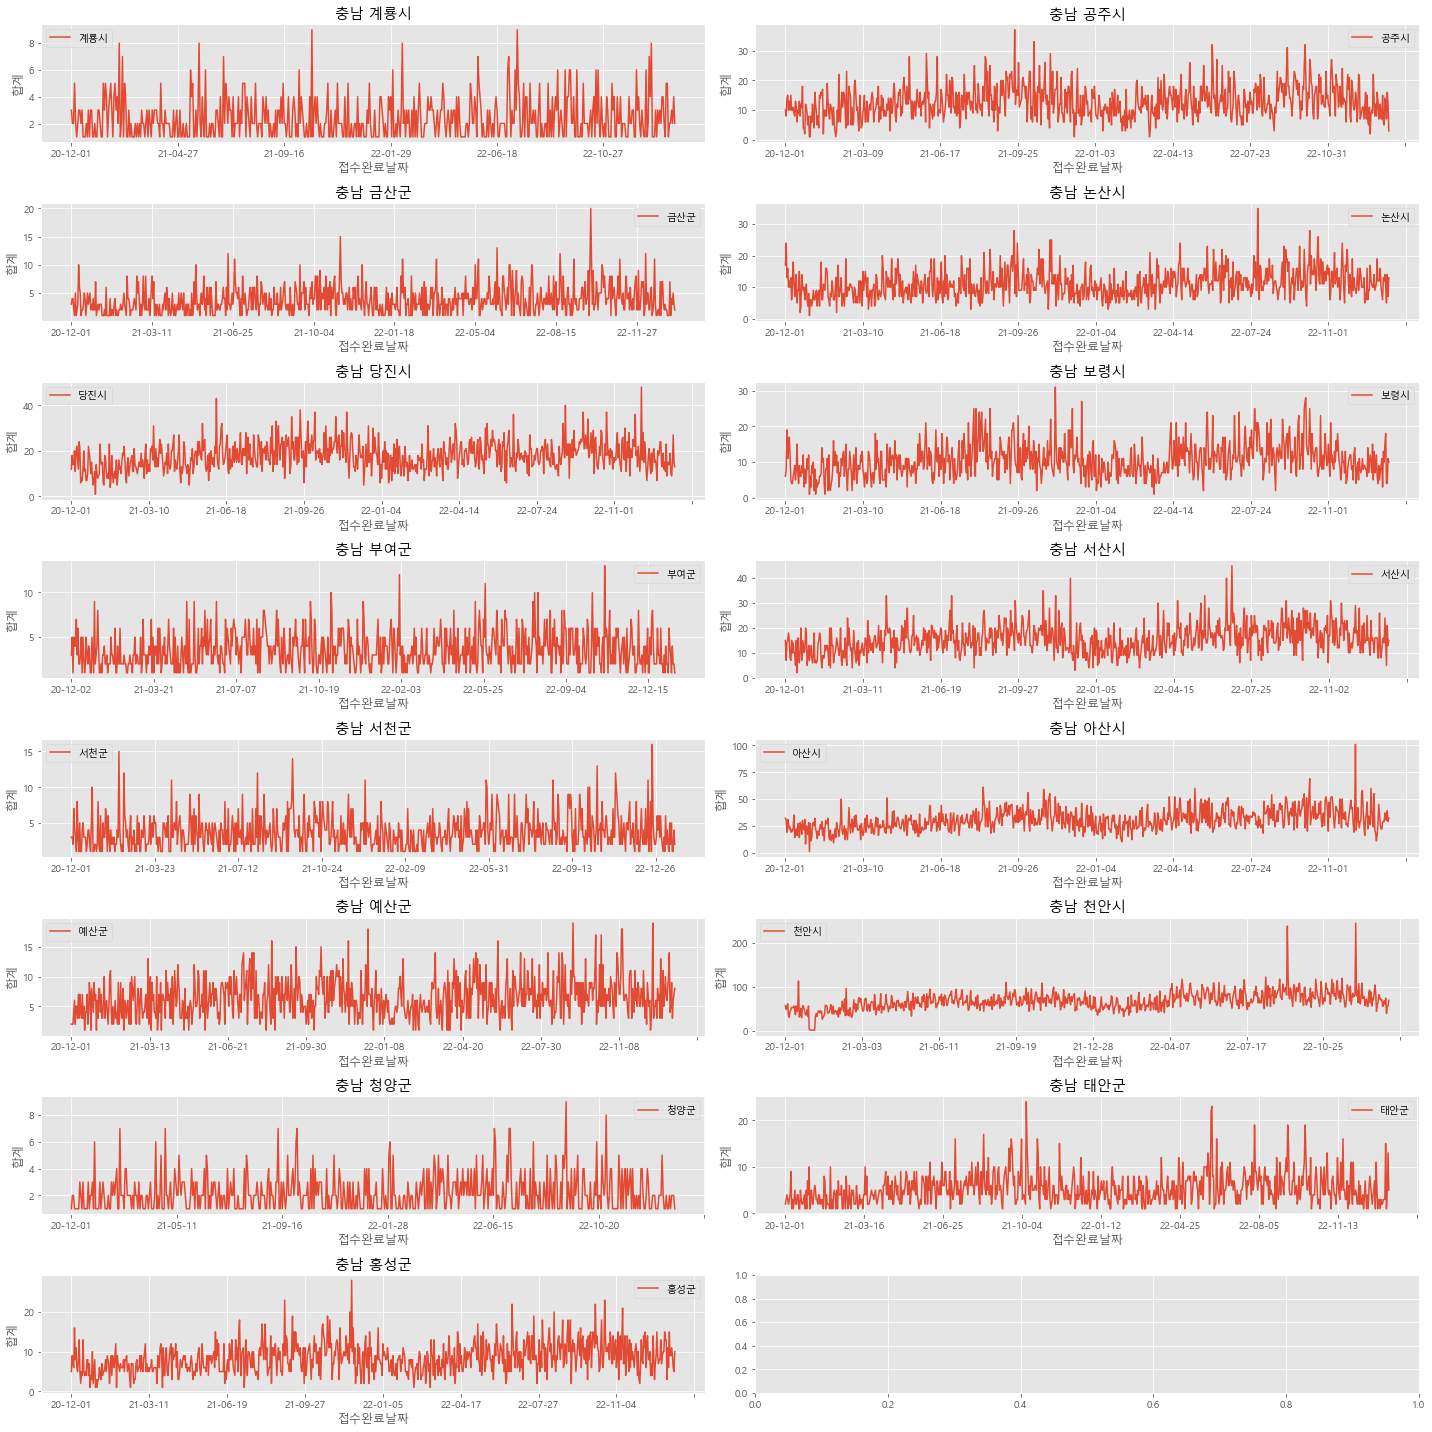

In [83]:
fig, axs = plt.subplots(nrows=math.ceil(len(chongnam_group['시군구'].unique()) / 2), ncols=2, figsize=(20, 20))
axs = axs.flatten()

for ax, (name, group) in zip(axs, chongnam_group.groupby('시군구')):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)
    ax.set_title('충남 ' + name)
    ax.set_xlabel('접수완료날짜')
    ax.set_ylabel('합계')
        
plt.tight_layout()
plt.show()

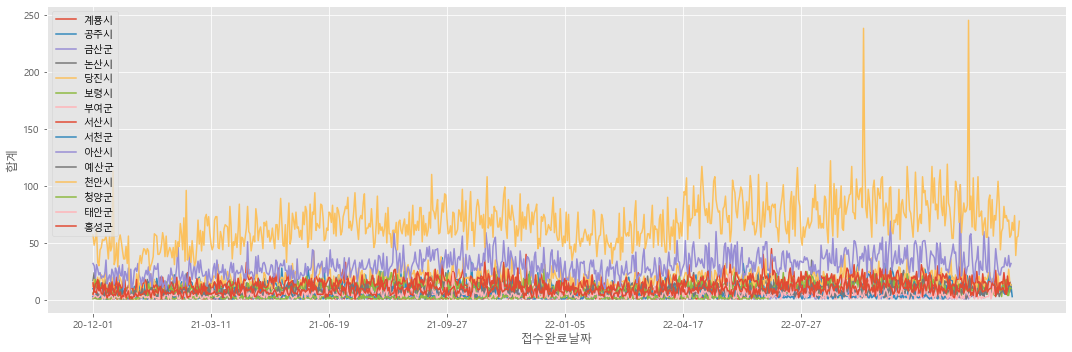

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))

for name, group in chongnam_group.groupby('시군구'):
    group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax, label=name)

    ax.set_xlabel('접수완료날짜')
    ax.set_ylabel('합계')
    ax.legend()

plt.tight_layout()
plt.show()

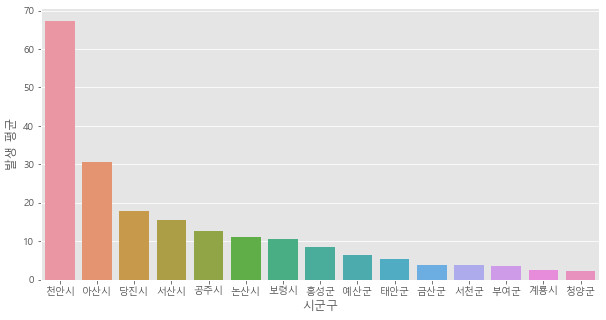

In [115]:
chonam_mean = chongnam_group.groupby('시군구').mean().sort_values(by='counts',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=chonam_mean.index,y='counts',data=chonam_mean)
plt.ylabel('발생 평균')
plt.show()

#### (3) 세종특별자치시

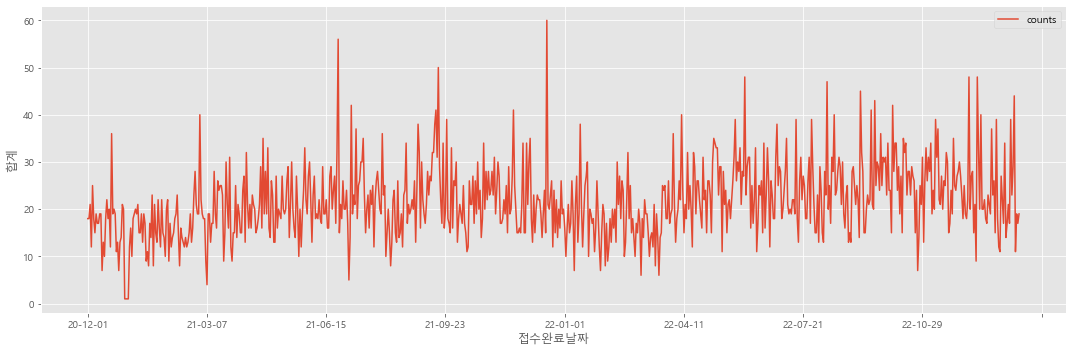

In [123]:
fig, ax = plt.subplots(figsize=(15, 5))
sejong_group.plot(x='접수완료날짜', y='counts', kind='line', ax=ax)
ax.set_xlabel('접수완료날짜')
ax.set_ylabel('합계')
plt.tight_layout()
plt.show()

#### 5. 사건종별 발생건수 

##### groupby().size() 집계 방식
##### 광역시도, 시군구, 사건종별 기준 총 몇번 발생했는지 집계 

In [170]:
melt = df.groupby(['광역시/도','시군구','사건종별']).size().reset_index(name='counts')
melt = melt.sort_values(by='counts',ascending=False)
melt

,광역시/도,시군구,사건종별,counts
85,충청남도,천안시,401,28486
10,대전광역시,서구,401,21790
16,대전광역시,유성구,401,14369
75,충청남도,아산시,401,13516
90,충청남도,천안시,406,11709
...,...,...,...,...
24,대전광역시,중구,405,1
98,충청남도,태안군,405,1
49,충청남도,논산시,405,1
73,충청남도,서천군,404,1


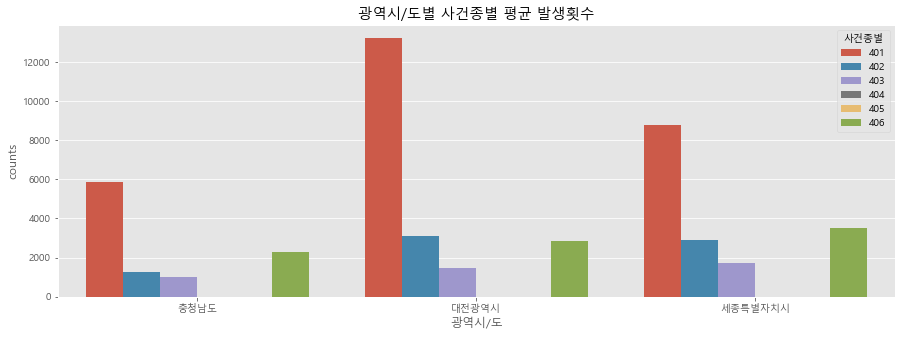

In [176]:
plt.figure(figsize=(15,5))
plt.title('광역시/도별 사건종별 평균 발생횟수')
sns.barplot(data=melt,x='광역시/도',y='counts', hue= '사건종별', ci=None)
plt.show();

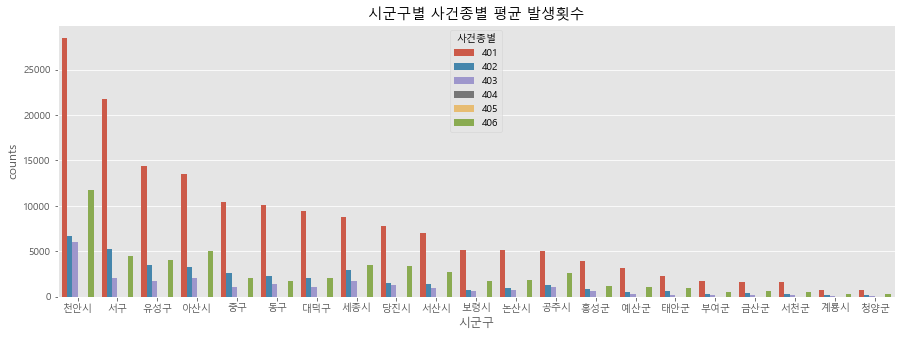

In [178]:
plt.figure(figsize=(15,5))
plt.title('시군구별 사건종별 평균 발생횟수')
sns.barplot(data=melt,x='시군구',y='counts', hue= '사건종별', ci=None)
plt.show();

In [181]:
df.head()

,접수부서,경찰청구분,사건상태,사건종별,신고성별,발생지점,발생좌표x,발생좌표y,접수완료날짜,접수완료시간대,접수연도,접수월,접수일자,접수완료시간,광역시/도,시군구,읍면동
0,충남청,19,10,401,2,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,20-12-01,08:17:50,20,12,1,8,충청남도,천안시,서북구
1,대전청,13,10,406,1,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,20-12-01,03:24:26,20,12,1,3,대전광역시,유성구,봉명동(행정:온천1동)
2,충남청,19,10,402,1,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,20-12-01,07:37:18,20,12,1,7,충청남도,천안시,서북구
3,대전청,13,10,401,1,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,20-12-01,07:08:44,20,12,1,7,대전광역시,중구,석교동(석교동)
4,대전청,13,10,401,2,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,20-12-01,07:09:20,20,12,1,7,대전광역시,중구,석교동(행정:석교동)


#### 6. 시간대별 사건발생 

In [194]:
time_df = df.groupby(['사건종별','시군구','읍면동','접수완료시간']).size().reset_index(name='counts')
time_df.sort_values(by='counts',ascending=False)

,사건종별,시군구,읍면동,접수완료시간,counts
14325,401,천안시,서북구,18,1199
14324,401,천안시,서북구,17,1128
14326,401,천안시,서북구,19,1022
14299,401,천안시,동남구,18,974
14328,401,천안시,서북구,21,972
...,...,...,...,...,...
22204,402,중구,사정동(산성동),13,1
22202,402,중구,사정동(산성동),8,1
22200,402,중구,사정동,23,1
22199,402,중구,사정동,21,1
